In [10]:
from encryption_model import *
import time
import matplotlib.pyplot as plt
plain_text = "hello"

In [2]:
def factorize(n):
    i=2
    while(i*i<=n):
        if(n%i==0):
            return i,n//i
        i+=1

In [3]:
def attack(e,n,cipher_text):
    # Get the factors of n
    p,q=factorize(n)
    # Calculate fai
    fai = (p-1)*(q-1)
    # Calculate the private key
    d=modinv(e,fai)
    # Decrypt the message
    return decrypt(int(cipher_text),d,n)

In [6]:
n_bits = range(15,31)
breaking_cipher_time = []
for i in n_bits:
    e,n,cipher_text = encrypt_black_box(plain_text,i)
    print(e,n,cipher_text)
    start_time = time.time()
    decrypted_message = attack(e,n,cipher_text)
    breaking_cipher_time.append(time.time()-start_time)
    print(decoder(decrypted_message))

3200108127 3853292629 1254298311
hello
1098126415 11409363271 437817985
hello
8564608469 29241492851 1729099555
hello
48544721605 90692168117 75413769043
hello
158982569479 458600954027 103868805787
hello
524308217761 1723856047499 486703402695
hello
5820024766691 6448871118211 1970258805461
hello
8613094876933 26645678365843 19922712018606
hello
17742271294051 84086412463643 58465129995766
hello
359661376951537 856182874058131 546319755593227
hello
1731317233735351 2007539519375939 112486923240919
hello
6891744452540011 9488807151675589 1726978713810322
hello
4159251501788651 24531371554547707 15717223929353005
hello
46456203347974391 148368613653067123 2255961722920341
hello
21434017570585801 555799293793002901 476391636640684934
hello
879209801238638833 2512033831400708161 1661468368205837137
hello
1607848088830653613 11203944659463045569 10737615912074242012


KeyboardInterrupt: 

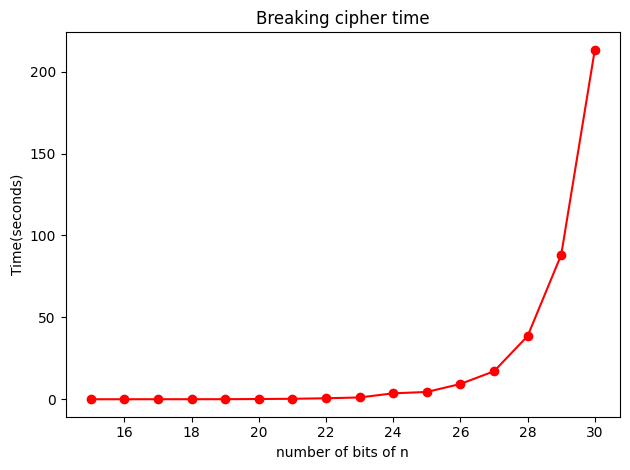

In [13]:
plt.plot(n_bits[:len(breaking_cipher_time)],breaking_cipher_time,marker="o",c="r")
plt.xlabel("number of bits of n")
plt.ylabel("Time(seconds)")
plt.title("Breaking cipher time")
plt.tight_layout()
plt.show()